In [11]:
# import pandas as pd
from lime.lime_tabular import LimeTabularExplainer
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

import sys
sys.path.append("../src/")

In [12]:
from svc import SVC
from mlp import MLPClassifier
from data_loader import DataLoader, plot_confusion_matrix

all_classes = ['Not Completed','Completed']
MOOC_feature_names = ['viewed',	'gender',	'grade',	'nevents', 'ndays_act',	'nplay_video',	'nchapters',	'age',	'votes',	'num_words']
categorical_features = ['gender']

In [13]:
# Load Data
dl = DataLoader()
X_train= dl.load(path = "../data/")[0]
X_complete, y_complete, X_incomplete, y_incomplete = dl.load_sample_data("../data/sample_data.pkl")
X_sample, y_sample = dl.load_sample_data(f"../data/sample_data.pkl", concatenated = True)

# Load ML Models
mlp = MLPClassifier(from_file = True, filename = "../src/MITx-MLP.pkl") # Multi-Layer Perceptron Classifier

/home/shusterl/Desktop/Explainable-Ai-Comps-2024/MOOC/LIME/../src/data_loader.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['gender']] = integer_encoded
/home/shusterl/Desktop/Explainable-Ai-Comps-2024/.venv/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelBinarizer from version 1.2.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/shusterl/Desktop/Explainable-Ai-Comps-2024/.venv/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle est

In [14]:
first_ten_X_complete = [(list, f"X_complete{index}") for index, list in enumerate(X_complete[:10])]
first_ten_X_incomplete = [(list, f"X_incomplete{index}") for index, list in enumerate(X_incomplete[:10])]
false_negatives = [(X_complete[i], f"false_negatives_from_X_complete{i}") for i in [1, 9, 26, 32, 34]]
false_positives = [(X_incomplete[i], f"false_positives_from_X_incomplete{i}") for i in [22]]

examples_for_user_study = first_ten_X_complete + first_ten_X_incomplete + false_negatives + false_positives

/home/shusterl/Desktop/Explainable-Ai-Comps-2024/.venv/lib/python3.10/site-packages/lime/explanation.py:168: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


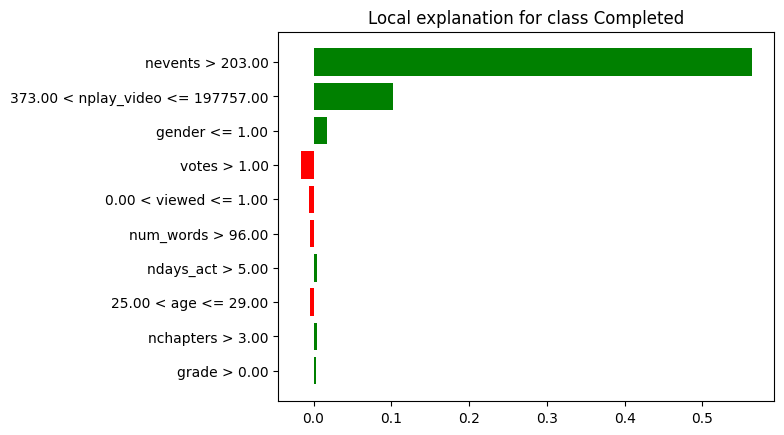

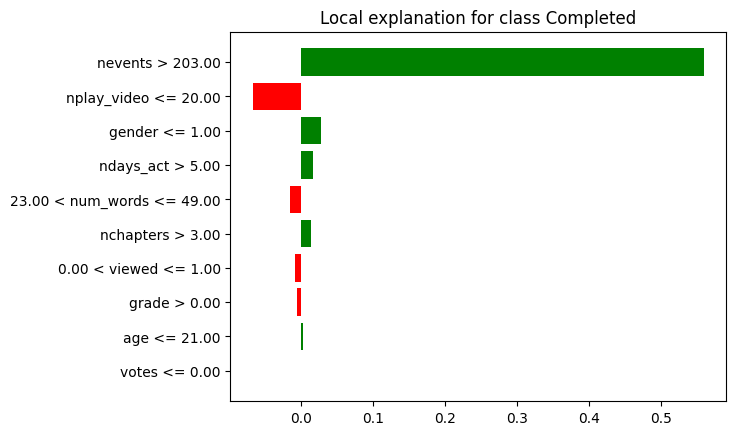

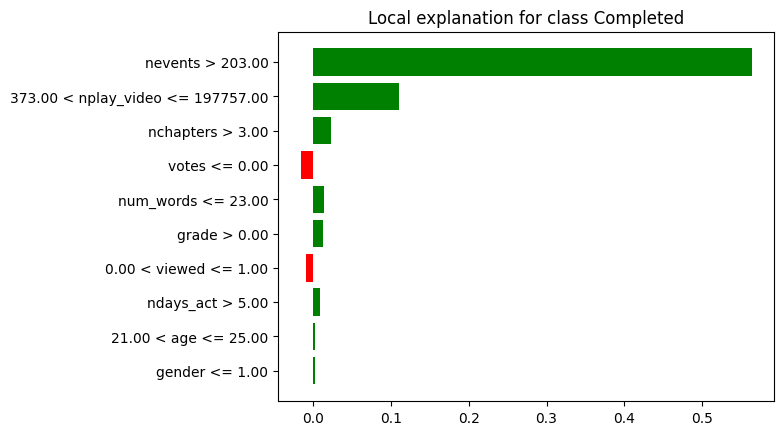

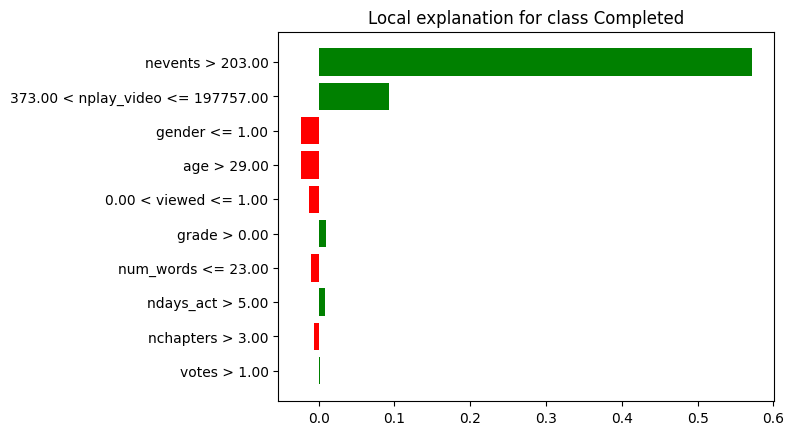

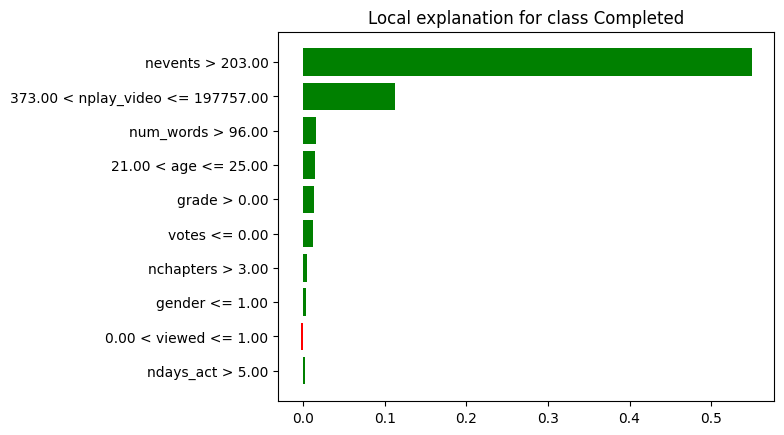

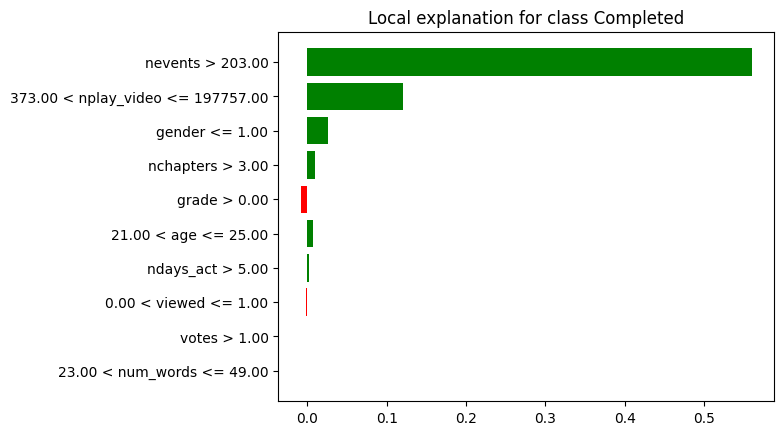

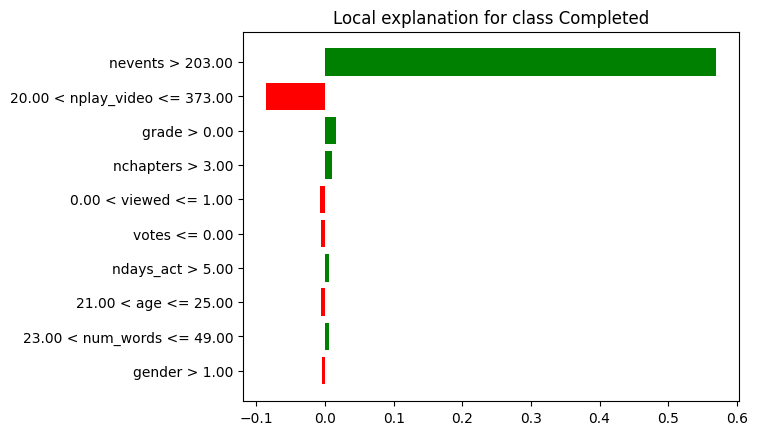

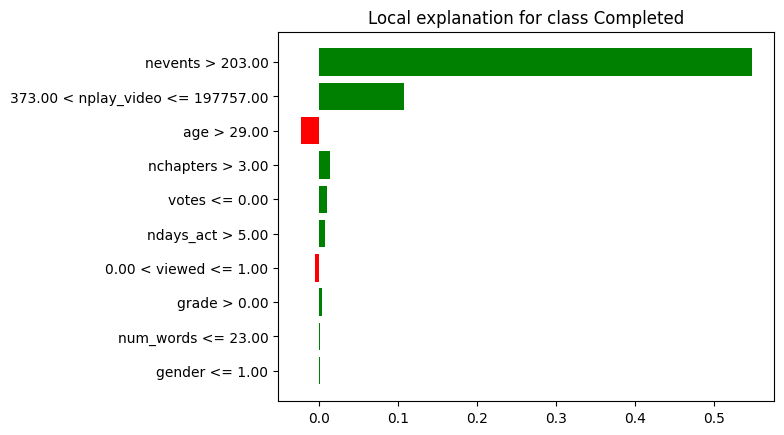

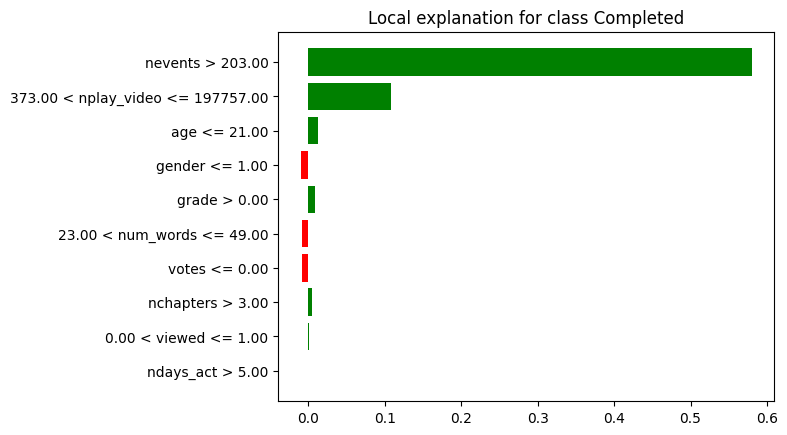

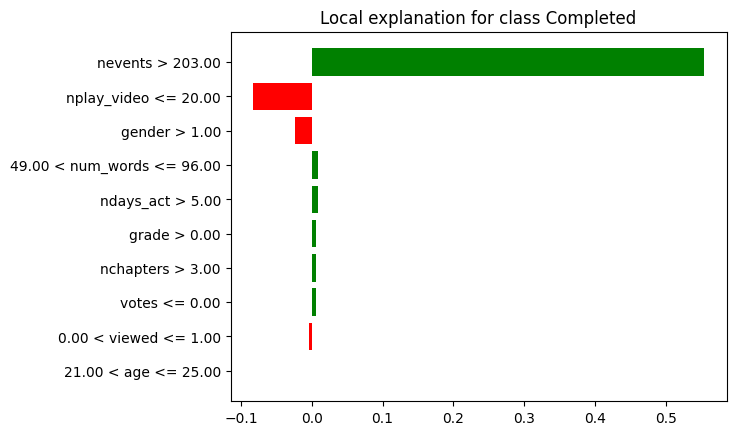

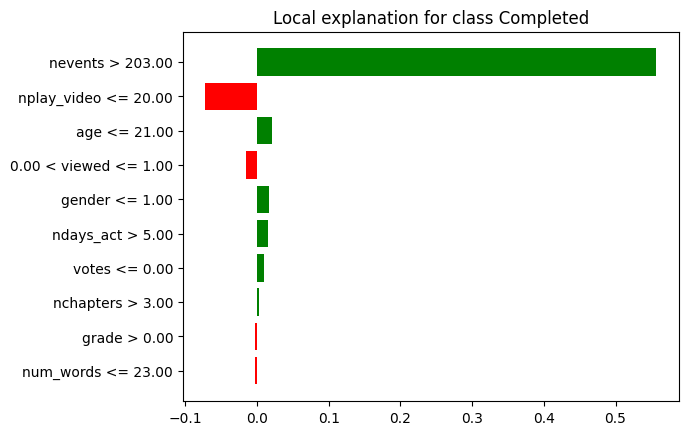

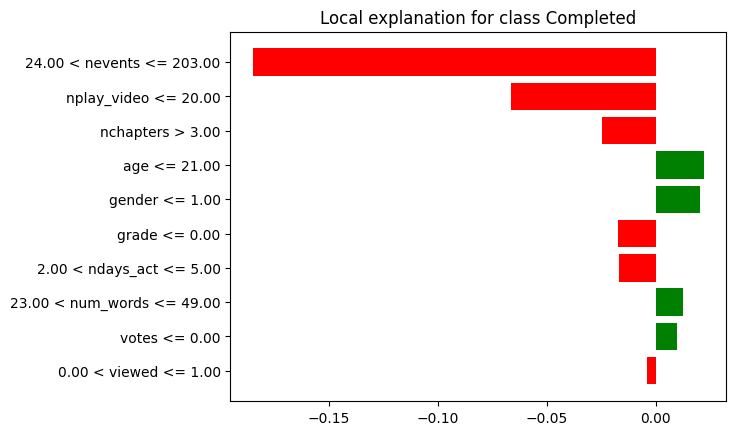

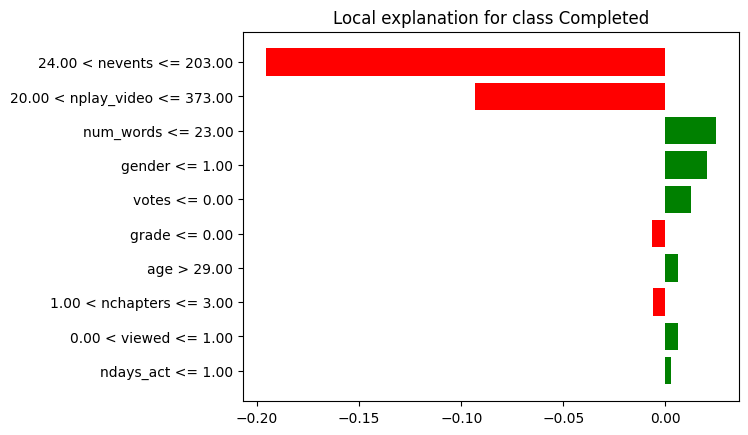

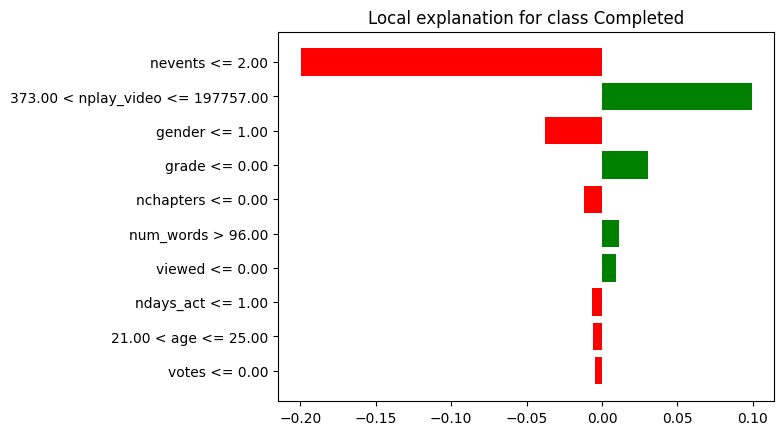

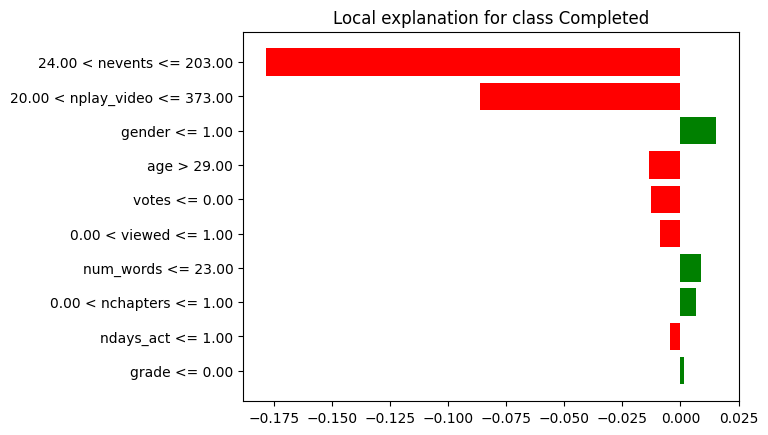

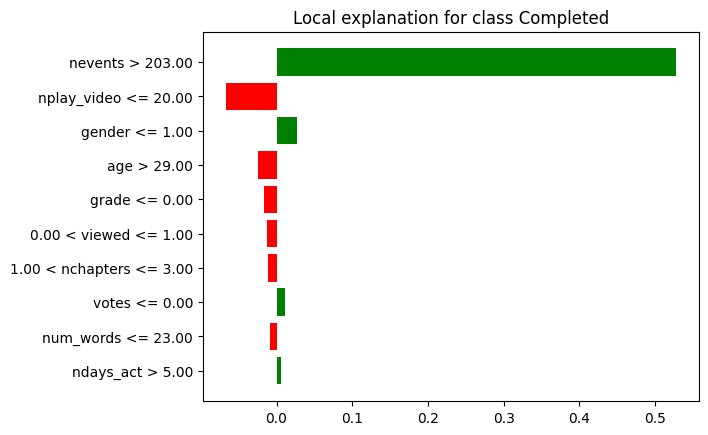

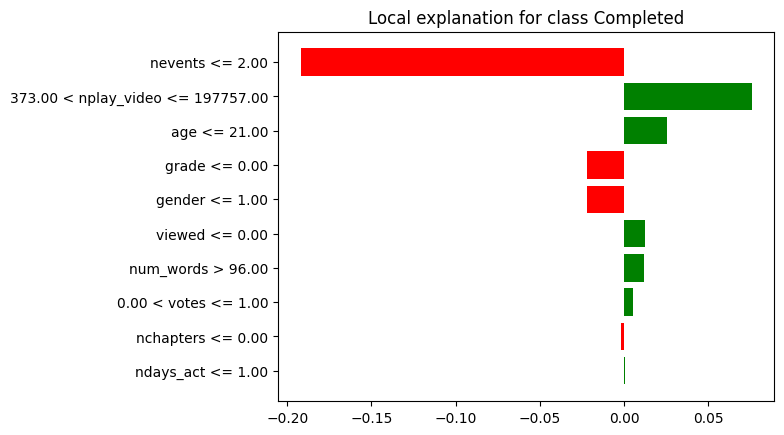

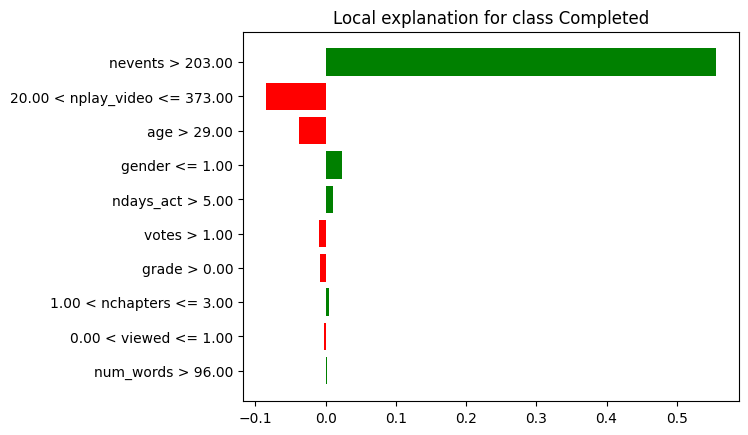

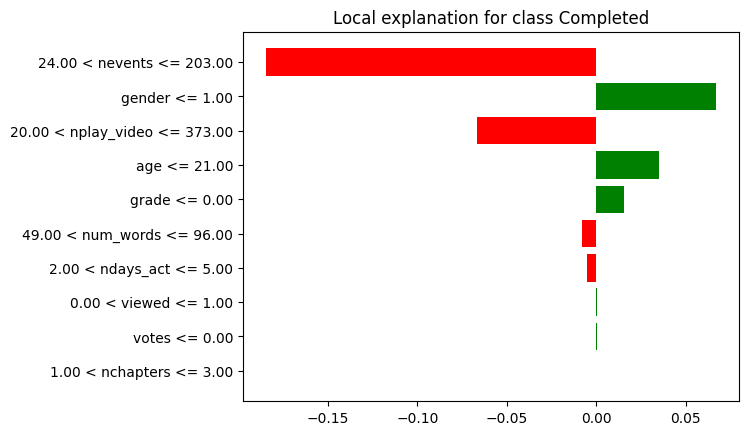

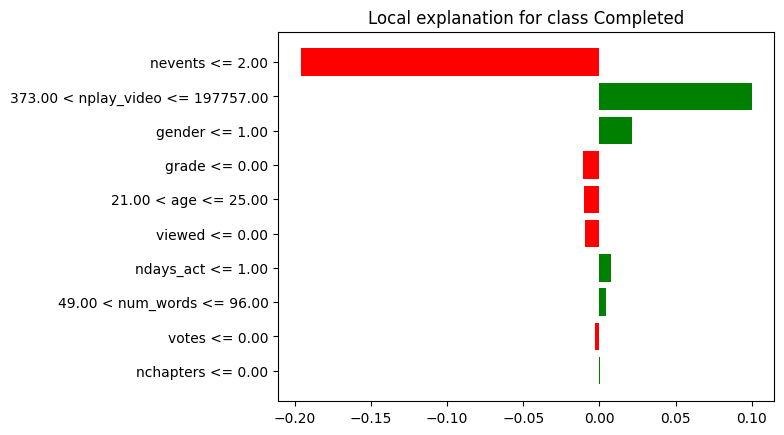

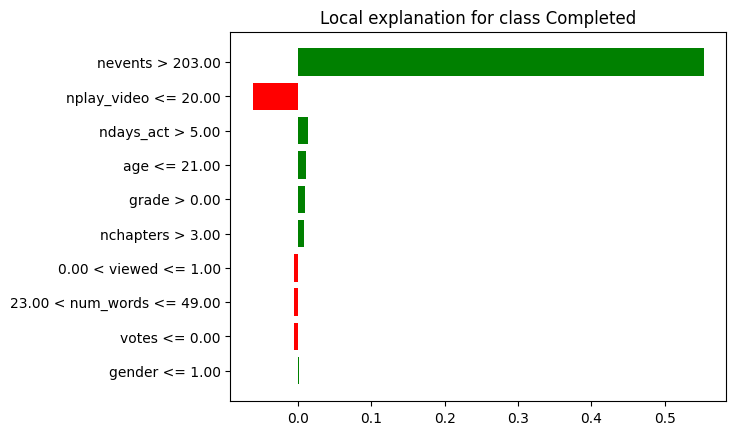

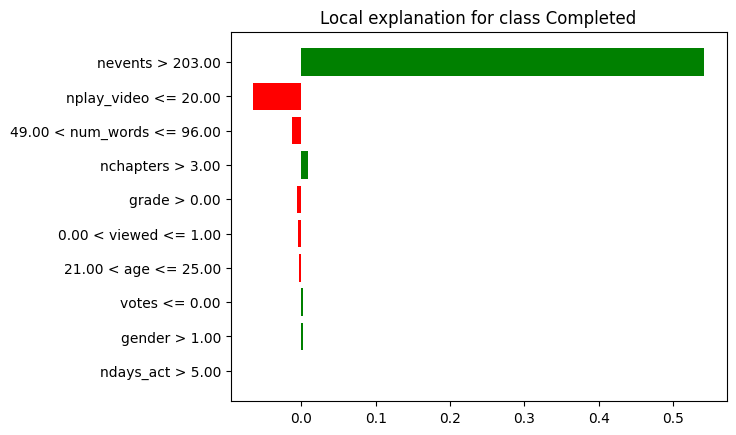

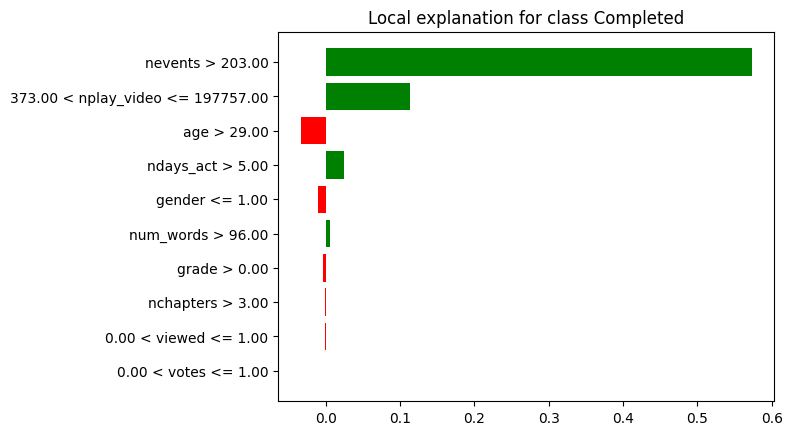

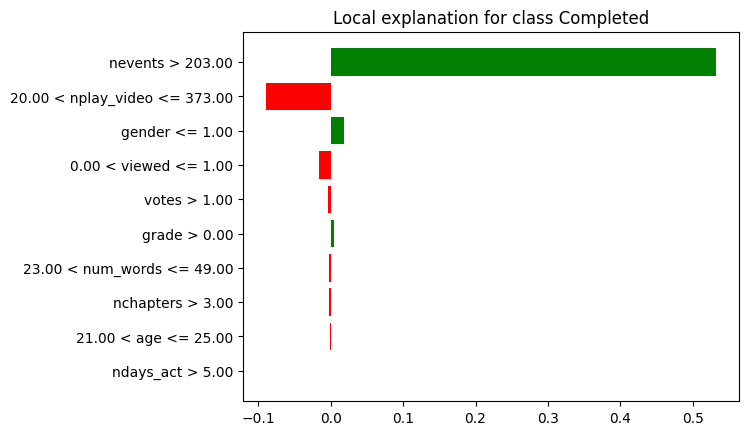

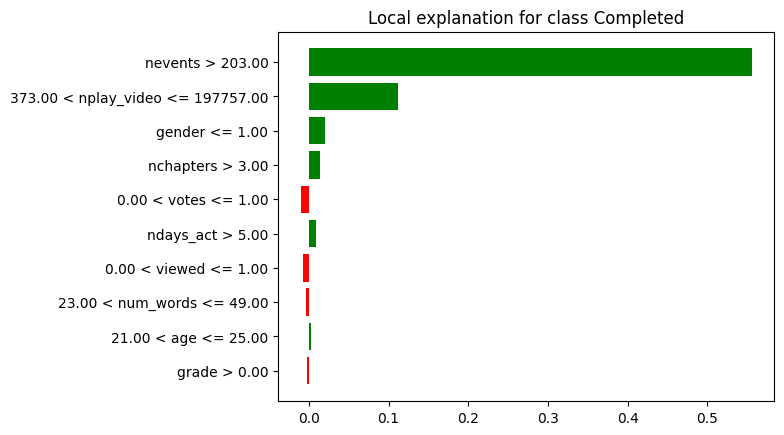

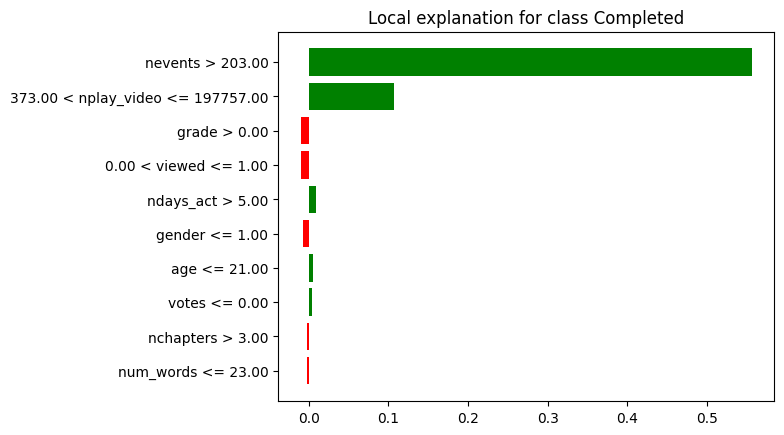

In [15]:

mlp_explainer = LimeTabularExplainer(
    X_train,
    feature_names=MOOC_feature_names,
    class_names=all_classes,
    discretize_continuous=True
)

for entry, file_name in examples_for_user_study:
    exp = mlp_explainer.explain_instance(entry, mlp.predict_proba)
    exp.as_pyplot_figure(label=1)
    plt.savefig(f"UserStudyExamples/images/{file_name}.png", bbox_inches='tight')
    exp.save_to_file(f"UserStudyExamples/html/{file_name}.html")
